<a href="https://colab.research.google.com/github/Ameer-Suhail/autoencoders/blob/main/autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models


4422102/4422102 [==============================] - 1s 0us/step


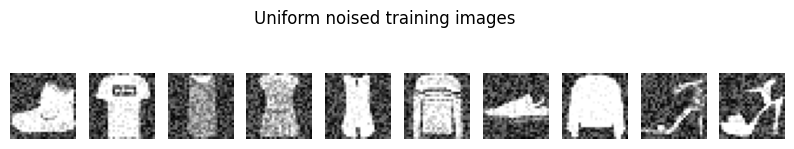

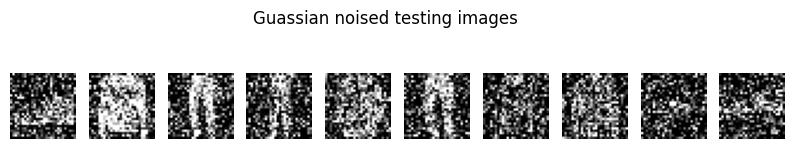

In [ ]:
(train_imgs,_),(test_imgs,_) = tf.keras.datasets.fashion_mnist.load_data()

train_imgs = train_imgs[:100]
test_imgs = test_imgs[:20]

#normalizing the images
train_imgs = train_imgs.astype('float32') / 255
test_imgs = test_imgs.astype('float32') / 255

#reshaping the images for tf's convolution
train_imgs = np.expand_dims(train_imgs, axis= -1)
test_imgs = np.expand_dims(test_imgs, axis = -1)

#adding uniform noise to the train dataset
#each pixel is modified (noise) with a random number drawn from a uniform distribution between 0 and 0.5
train_imgs_noisy = train_imgs + np.random.uniform(0, 0.5, train_imgs.shape)
train_imgs_noisy = np.clip(train_imgs_noisy, 0., 1.)

#adding guassian noise to the test dataset
test_imgs_noisy = test_imgs + np.random.normal(0, 0.5, test_imgs.shape)
test_imgs_noisy = np.clip(test_imgs_noisy, 0., 1.)

#plot and evaluate sample images

plt.figure(figsize=(10,2))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(train_imgs_noisy[i].reshape(28,28), cmap="gray")
  plt.axis('off')
plt.suptitle("Uniform noised training images")
plt.show()

plt.figure(figsize=(10,2))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(test_imgs_noisy[i].reshape(28,28), cmap="gray")
  plt.axis('off')
plt.suptitle("Guassian noised testing images")
plt.show()




In [ ]:
def init_autoencoder(shape):
  input_img = layers.Input(shape = shape)

  var = layers.Conv2D(32, (3,3), activation= "relu", padding="same")(input_img)
  var = layers.MaxPool2D((2,2), padding='same')(var)
  var = layers.Conv2D(32, (3,3), activation= "relu", padding="same")(var)
  var = layers.MaxPool2D((2,2), padding='same')(var)
  var = layers.Conv2D(32, (3,3), activation= "relu", padding="same")(var)
  var = layers.MaxPool2D((2,2), padding='same')(var)
  var = layers.Conv2D(32, (3,3), activation= "relu", padding="same")(var)
  encoded = layers.MaxPool2D((2,2), padding='same')(var)

  var = layers.Conv2D(32, (3,3), activation= "relu", padding="same")(encoded)
  var = layers.UpSampling2D((2,2))(var)
  var = layers.Conv2D(32, (3,3), activation= "relu", padding="same")(var)
  var = layers.UpSampling2D((2,2))(var)
  var = layers.Conv2D(32, (3,3), activation= "relu", padding="same")(var)
  var = layers.UpSampling2D((2,2))(var)
  var = layers.Conv2D(32, (3,3), activation= "relu", padding="same")(var)
  var = layers.UpSampling2D((2,2))(var)
  var = layers.Conv2D(1, (3,3), activation= "sigmoid", padding="same")(var)
  decoded = layers.Cropping2D(((2, 2), (2, 2)))(var)

  autoencoder = models.Model(input_img, decoded)
  return autoencoder





In [ ]:
autoencoder = init_autoencoder((28,28,1))
autoencoder.compile(optimizer = 'adam', loss = 'mse')
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 7, 7, 32)          9248

In [ ]:
trained = autoencoder.fit(train_imgs_noisy, train_imgs, epochs = 40, batch_size = 16, shuffle = True, validation_split = 0.2)

Epoch 1/40
5/5 [==============================] - 2s 83ms/step - loss: 0.1654 - val_loss: 0.1457
Epoch 2/40
5/5 [==============================] - 0s 44ms/step - loss: 0.1384 - val_loss: 0.1075
Epoch 3/40
5/5 [==============================] - 0s 44ms/step - loss: 0.1066 - val_loss: 0.0986
Epoch 4/40
5/5 [==============================] - 0s 47ms/step - loss: 0.0934 - val_loss: 0.1003
Epoch 5/40
5/5 [==============================] - 0s 43ms/step - loss: 0.0910 - val_loss: 0.0862
Epoch 6/40
5/5 [==============================] - 0s 42ms/step - loss: 0.0868 - val_loss: 0.0911
Epoch 7/40
5/5 [==============================] - 0s 47ms/step - loss: 0.0845 - val_loss: 0.0834
Epoch 8/40
5/5 [==============================] - 0s 42ms/step - loss: 0.0820 - val_loss: 0.0822
Epoch 9/40
5/5 [==============================] - 0s 47ms/step - loss: 0.0792 - val_loss: 0.0746
Epoch 10/40
5/5 [==============================] - 0s 42ms/step - loss: 0.0749 - val_loss: 0.0720
Epoch 11/40
5/5 [============

In [ ]:
denoised_imgs = autoencoder.predict(test_imgs_noisy)

1/1 [==============================] - 0s 27ms/step


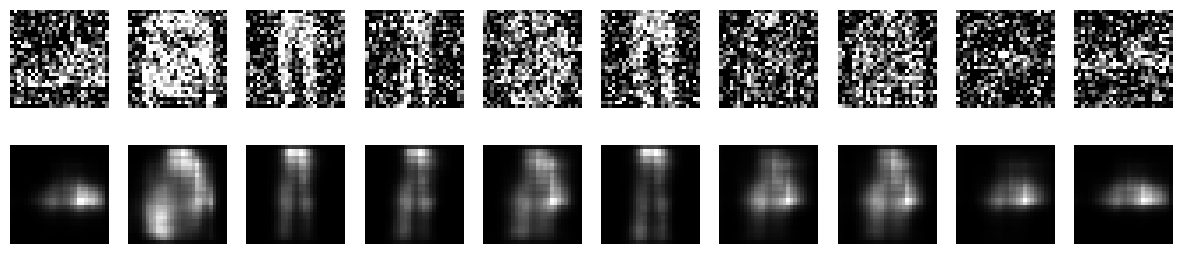

In [ ]:
#comparing the images before and after (10 images)
plt.figure(figsize=(15,5))
num_imgs = 10
for i in range(num_imgs):
  #before
  x = plt.subplot(3, 10, i + 1 + num_imgs)
  plt.imshow(test_imgs_noisy[i].reshape(28,28), cmap='gray')
  plt.axis('off')
  #after
  x = plt.subplot(3, 10, i + 1 + 2*num_imgs)
  plt.imshow(denoised_imgs[i].reshape(28,28), cmap='gray')
  plt.axis('off')
plt.show()
